In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf /content/runs

In [ ]:
#DEFECT = 'inclusions'
#ZIP_FILE = 'inclusions.zip'

DEFECT = 'scratches'
ZIP_FILE = 'scratches.zip'
EPOCHS = 10

PATH = '/content/'+ DEFECT + '/dataset/'
PATH_MYDRIVE = '/content/drive/MyDrive/Colab Notebooks/01_proplex/' + DEFECT + '/'
FULL_PATH = PATH_MYDRIVE + ZIP_FILE
print(FULL_PATH)

/content/drive/MyDrive/Colab Notebooks/01_proplex/scratches/scratches.zip


In [ ]:
from zipfile import ZipFile

with ZipFile(FULL_PATH, "r") as myzip:
    myzip.extractall(path= DEFECT + '/', members=None, pwd=None)

In [ ]:
import os
import shutil
import random
import pickle
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
from PIL import Image

0 0.5092452708530305 0.33043463275235674 0.1756573877309504 0.023115464727209344
0 0.5104539226034729 0.413151736923253 0.1442324422194501 0.014503821005307813
0 0.5197202526901973 0.2547428168809065 0.15793049539112972 0.020395998288714096


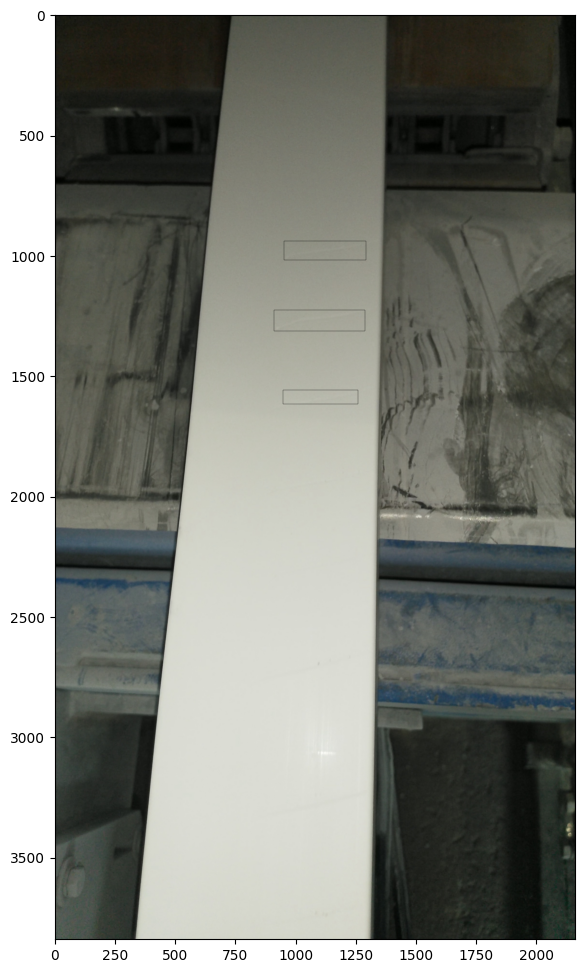

In [ ]:
files = os.listdir(PATH + 'images/train')
image_file = random.choice(files)

image = plt.imread(PATH + 'images/train/' + image_file)

plt.figure(figsize = (12, 12))
plt.imshow(image)
height, width, _ = image.shape

txt_file = PATH + 'labels/train/'+ image_file.split('.')[0] + '.txt'

ax = plt.gca()

with open(txt_file, "r") as f1:
  for line in f1.readlines():
    markup = line.split(" ")
    class_id = int(markup[0])
    x, y, w, h = float(markup[1]), float(markup[2]), float(markup[3]), float(markup[4])
    print(class_id, x, y, w, h)
    rect = Rectangle((int((x - 0.5 * w) * width), int((y - 0.5 * h) * height)), w*width, h*height, fill = False, linewidth = 0.2, color = "black")
    ax.add_patch(rect)

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 24.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
with open(PATH_MYDRIVE + 'total_epochs.txt', 'rb') as f:
     total_epochs = pickle.load(f)  # количество эпох, на которых уже обучалась модель

#model = YOLO('yolov10n.pt')
model = YOLO(PATH_MYDRIVE + 'runs/detect/train/weights/last.pt')

results = model.train(data = PATH + 'dataset.yaml', epochs = EPOCHS)

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab Notebooks/01_proplex/scratches/runs/detect/train/weights/last.pt, data=/content/scratches/dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128

train: Scanning /content/scratches/dataset/labels/train... 542 images, 6 backgrounds, 0 corrupt: 100%|██████████| 542/542 [00:00<00:00, 715.65it/s]


train: New cache created: /content/scratches/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/scratches/dataset/labels/valid... 67 images, 2 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:00<00:00, 1396.41it/s]

val: New cache created: /content/scratches/dataset/labels/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      3.559      2.298      2.209         15        640: 100%|██████████| 34/34 [09:05<00:00, 16.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.11s/it]

                   all         67        114      0.754      0.675      0.747      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.668      2.441      2.193         26        640: 100%|██████████| 34/34 [08:57<00:00, 15.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.49s/it]

                   all         67        114      0.628      0.456      0.516      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.786       2.42      2.286         22        640: 100%|██████████| 34/34 [08:57<00:00, 15.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.38s/it]

                   all         67        114      0.661      0.616      0.692      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.855      2.676      2.364         20        640: 100%|██████████| 34/34 [08:58<00:00, 15.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.20s/it]

                   all         67        114      0.586      0.404      0.447      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G       3.84      2.597      2.269         19        640: 100%|██████████| 34/34 [09:04<00:00, 16.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.22s/it]

                   all         67        114      0.496       0.38      0.402       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G       3.72      2.473      2.288         21        640: 100%|██████████| 34/34 [09:08<00:00, 16.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.98s/it]

                   all         67        114       0.91      0.509      0.677      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.663      2.467       2.16         30        640: 100%|██████████| 34/34 [09:02<00:00, 15.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.38s/it]

                   all         67        114      0.742      0.656      0.725      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      3.617      2.432      2.248         22        640: 100%|██████████| 34/34 [08:58<00:00, 15.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.43s/it]

                   all         67        114      0.643      0.658      0.706      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      3.618      2.276      2.207         13        640: 100%|██████████| 34/34 [09:00<00:00, 15.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.07s/it]

                   all         67        114      0.715      0.693      0.753      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G        3.6      2.306      2.193         26        640: 100%|██████████| 34/34 [09:06<00:00, 16.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.40s/it]

                   all         67        114      0.703      0.684      0.754      0.388



10 epochs completed in 1.582 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.26s/it]


                   all         67        114      0.698      0.689      0.754      0.388
Speed: 3.1ms preprocess, 207.2ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


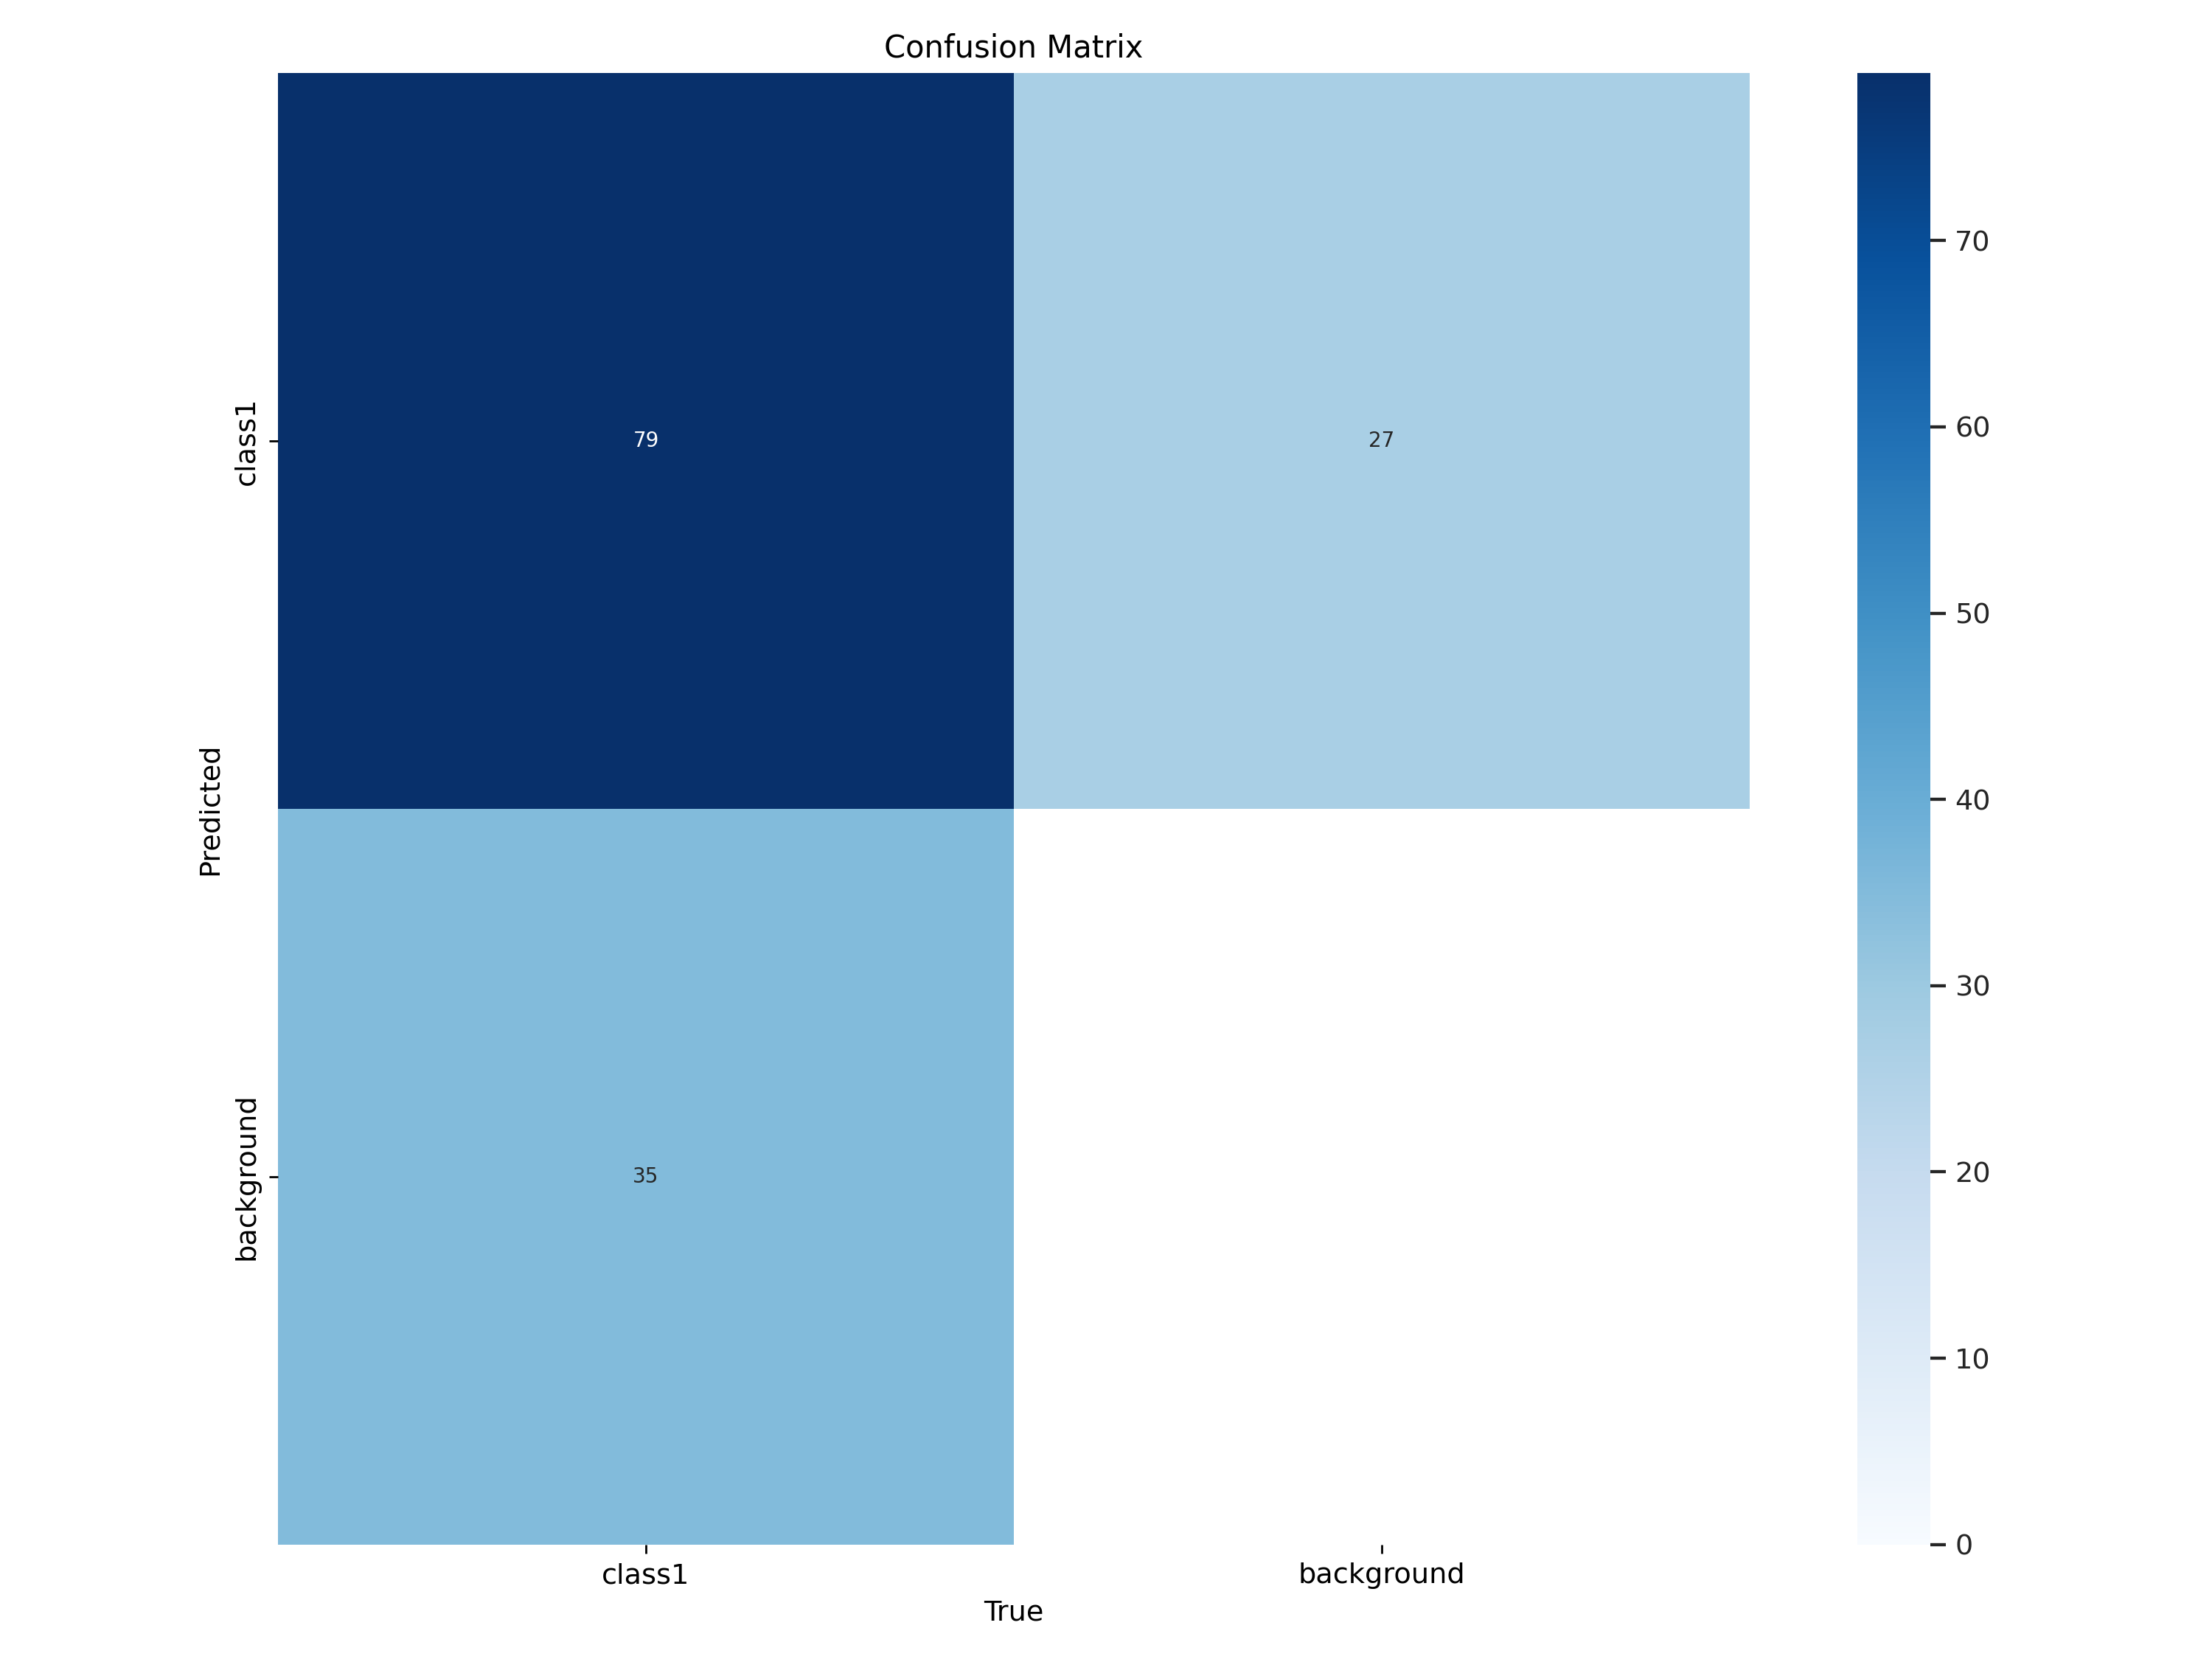

In [ ]:
img = Image.open('runs/detect/train/confusion_matrix.png')
display(img)

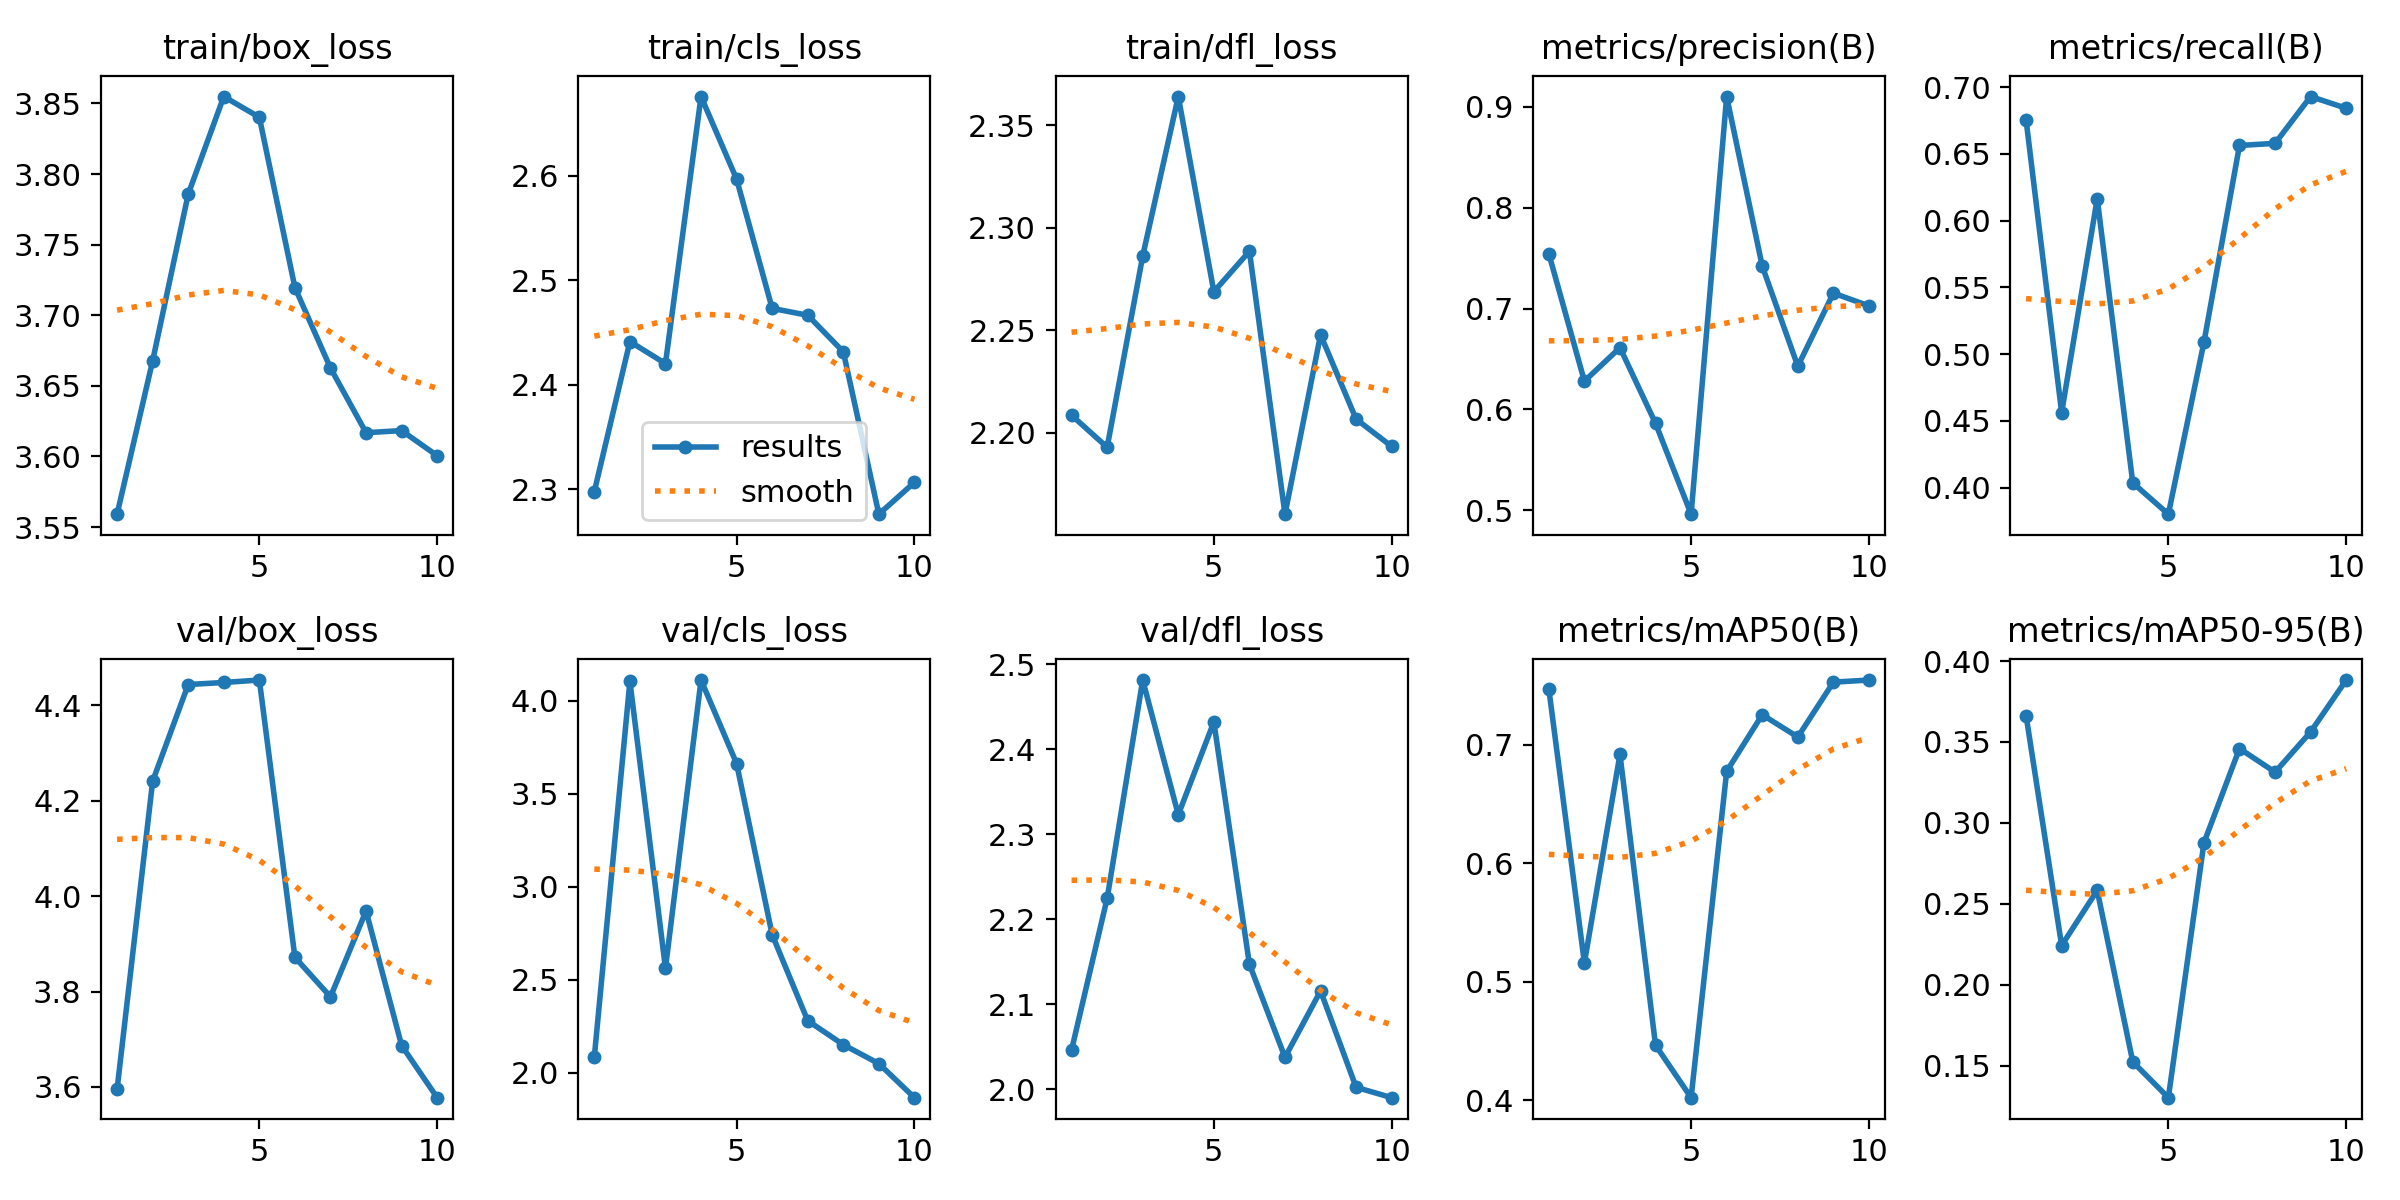

In [ ]:
img = Image.open('runs/detect/train/results.png')
display(img)

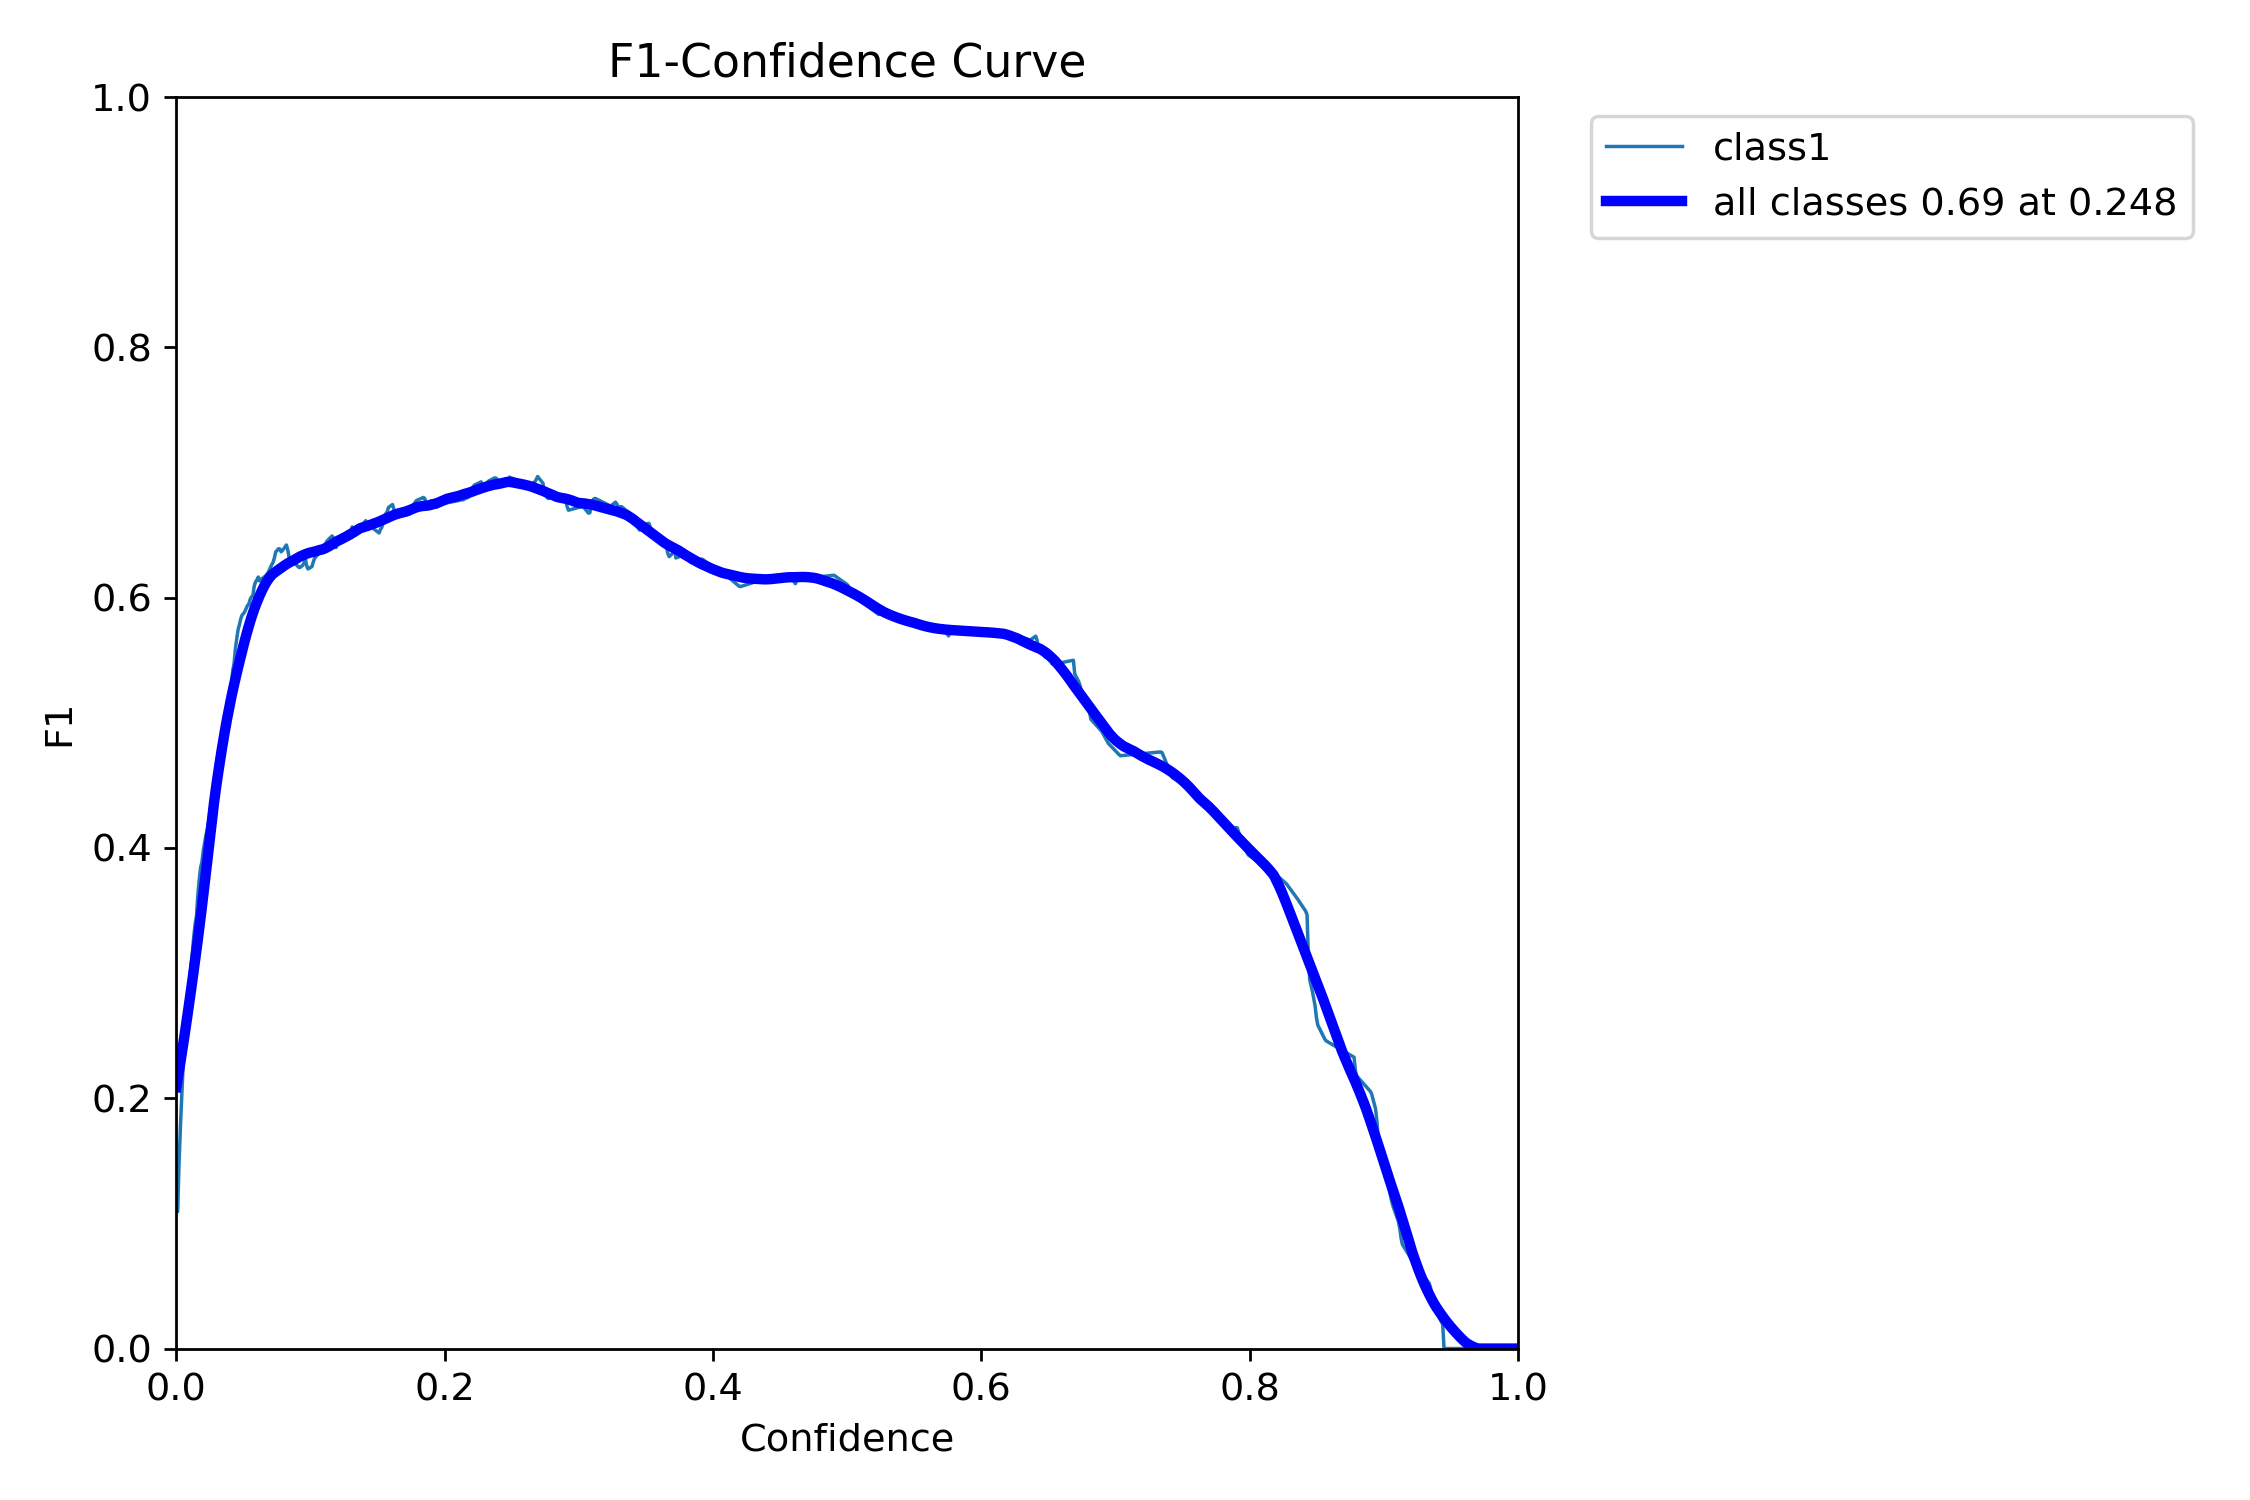

In [ ]:
img = Image.open('runs/detect/train/F1_curve.png')  # P_curve.png, PR_curve.png, R_curve.png
display(img)

In [ ]:
if os.path.exists(PATH_MYDRIVE + 'runs'):
  shutil.rmtree(PATH_MYDRIVE + 'runs')
shutil.copytree('/content/runs', PATH_MYDRIVE + 'runs')

'/content/drive/MyDrive/Colab Notebooks/01_proplex/scratches/runs'

In [ ]:
with open(PATH_MYDRIVE + 'total_epochs.txt', 'wb') as f:
    pickle.dump(EPOCHS+total_epochs, f)

In [ ]:
print('Модель обучена на ' + str(EPOCHS+total_epochs) + ' эпохах')

Модель обучена на 125 эпохах


In [ ]:
# files = os.listdir(PATH + 'images/train')
# image_file = random.choice(files)

# model.predict(PATH + 'images/train/' + image_file, save = True, show = True)